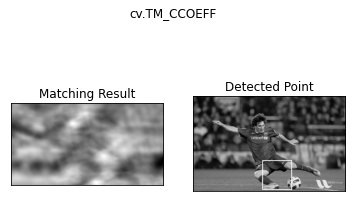

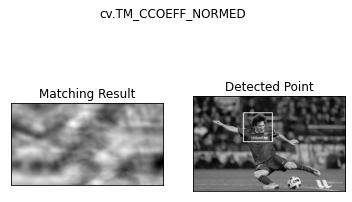

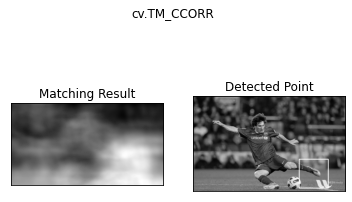

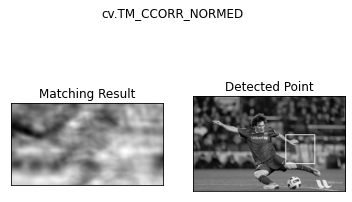

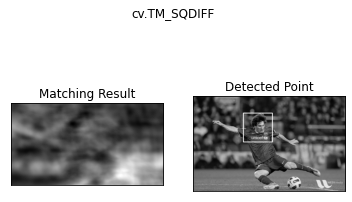

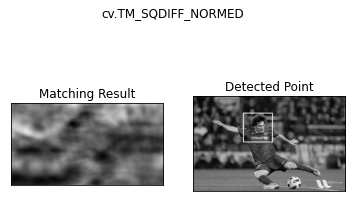

In [11]:
#函数：cv.matchTemplate(), cv.minMaxLoc()
import numpy as np
import cv2 as cv 
from matplotlib import pyplot as plt

img7 = cv.imread("../Images/img7.jpg")
img7 = cv.cvtColor(img7, cv.COLOR_BGR2GRAY)
target = img7.copy()
template = cv.imread("../Images/img7_1.png")
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
w, h = template.shape[::-1]
#列表中所有的6种比较方法
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img7 = target.copy()
    method = eval(meth)
    # 应用模板匹配
    res = cv.matchTemplate(img7,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # 如果方法是TM_SQDIFF或TM_SQDIFF_NORMED，则取最小值
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img7,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img7,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

39 56


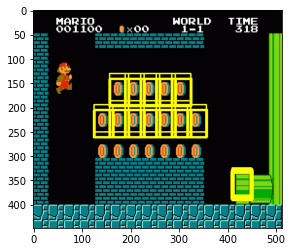

In [51]:
#多对象匹配
img22 = cv.imread("../Images/img22.png")
img22_gray = cv.cvtColor(img22, cv.COLOR_BGR2GRAY)
#plt.imshow(img22_gray,'gray')
#plt.show()
template = cv.imread('../Images/img22_1.png')
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
#plt.imshow(template_gray,'gray')
#plt.show()
w, h = template_gray.shape[:: -1]
print(w,h)
res = cv.matchTemplate(img22_gray, template_gray, cv.TM_CCOEFF_NORMED)
threshold = 0.55
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img22, pt, (pt[0] + w , pt[1]+ h), (0,255,255), 2)


"""
cv.imshow("image",img22 )
cv.waitKey(0)
cv.destroyAllWindows()
"""
img22 = img22[:, :, :: -1]
plt.imshow(img22)
plt.show()
#错误原因分析：因为匹配时采用灰度图像，所以水管被匹配到了